In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

model = models.Sequential()
model.add(layers.Conv2D(6, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))  # 5 lớp cho 5 class

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


2025-05-18 17:48:15.054046: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,966,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,977,837 (7.54 MB)

 Trainable params: 1,977,837 (7.54 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 8

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'HoaVietNam/new_train',
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    'HoaVietNam/val',
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'HoaVietNam/test',
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 100 images belonging to 5 classes.


Found 50 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [4]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.2423 - loss: 1.5973 - val_accuracy: 0.3000 - val_loss: 1.5735
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.3555 - loss: 1.5376 - val_accuracy: 0.4200 - val_loss: 1.5373
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.4675 - loss: 1.5017 - val_accuracy: 0.4000 - val_loss: 1.4970
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.4286 - loss: 1.4359 - val_accuracy: 0.4000 - val_loss: 1.4532
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.5891 - loss: 1.4069 - val_accuracy: 0.4600 - val_loss: 1.4117
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.6850 - loss: 1.3004 - val_accuracy: 0.4800 - val_loss: 1.3730
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.7698 - loss: 1.2784 - val_accuracy: 0.5400 - val_loss: 1.3330
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.7653 - loss: 1.2393 - val_accuracy: 0.

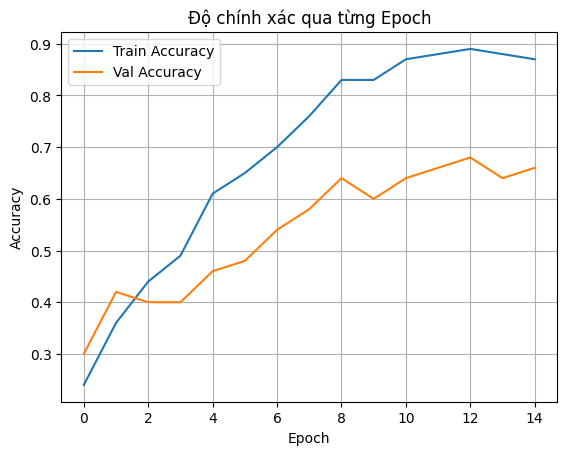

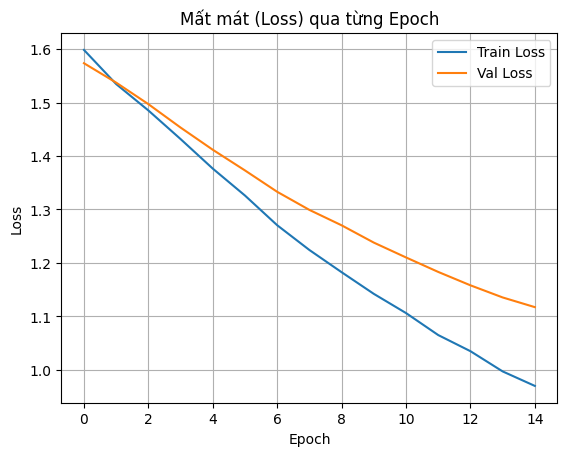

In [5]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Độ chính xác qua từng Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Mất mát (Loss) qua từng Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
from sklearn.metrics import classification_report
import numpy as np
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
📊 Classification Report:
              precision    recall  f1-score   support

         Cuc       0.88      0.70      0.78        10
         Dao       0.56      1.00      0.71        10
         Lan       1.00      0.40      0.57        10
         Mai       0.70      0.70      0.70        10
         Tho       0.80      0.80      0.80        10

    accuracy                           0.72        50
   macro avg       0.79      0.72      0.71        50
weighted avg       0.79      0.72      0.71        50

